In [19]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')
rtest = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t''')

In [20]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=123)
X = X.toarray()

X_test, y_test = load_svmlight_file(f=BytesIO(rtest.content), n_features=123)
X_test = X_test.toarray()

In [21]:
import numpy as np

# preprocess
n_samples, n_features = X.shape
X_train = np.column_stack((X, np.ones((n_samples, 1))))

X_test = np.column_stack((X_test, np.ones((X_test.shape[0], 1))))

y_train = np.where(y==1, y, 0)
y_test = np.where(y_test==1, y_test, 0)
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [63]:
# setting hyper-parameters
learning_rate = 0.02
max_epoch = 800
batch_size = 256
threshold = 0.5

losses_train = []
losses_val = []
val_acc = []

In [64]:
# select different initializing method
w = np.zeros((n_features + 1, 1))  # initialize with zeros
#w = np.random.random((n_features + 1, 1))  # initialize with random numbers
#w = np.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [65]:
acc_zeros = []
acc_random = []
acc_normal = []

In [66]:
def sigmoid(data):
    return 1/(1+np.exp(-data))

def predict(data):
    return sigmoid(np.dot(data, w))

def getLoss(pre, label):
    return -np.mean(label*np.log(pre)+(1-label)*(np.log(1-pre)))

In [67]:
for epoch in range(max_epoch):
    
    # select a batch from training set
    choice_index = np.random.choice(n_samples, batch_size)
    selected_y = y_train[choice_index]
    selected_X = X_train[choice_index]
    selected_predict = predict(selected_X)
    G = ((selected_predict - selected_y).T.dot(selected_X))/batch_size  # calculate the gradient
    G = -G.T
    w += learning_rate * G  # update the parameters

    # predict and get train loss
    pre = predict(selected_X)
    loss_train = getLoss(pre, selected_y)
    losses_train.append(loss_train)
    
    #print(pre)
    #print(y_train)
    
    # predict and get test loss and accuracy
    test_pre = predict(X_test)
    loss_val = getLoss(test_pre, y_test)
    losses_val.append(loss_val)
    test_pre = np.where(test_pre>=threshold, 1, 0)
    acc = np.mean(test_pre==y_test)
    val_acc.append(acc)
    acc_zeros.append(acc)
    #acc_random.append(acc)
    #acc_normal.append(acc)
    

In [68]:
print(val_acc[-10:])

[0.8300472943922363, 0.830108715680855, 0.8299858731036177, 0.8304772434125668, 0.8304772434125668, 0.8304772434125668, 0.8303544008353295, 0.830108715680855, 0.8299858731036177, 0.8302929795467109]


(array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75]),
 <a list of 11 Text yticklabel objects>)

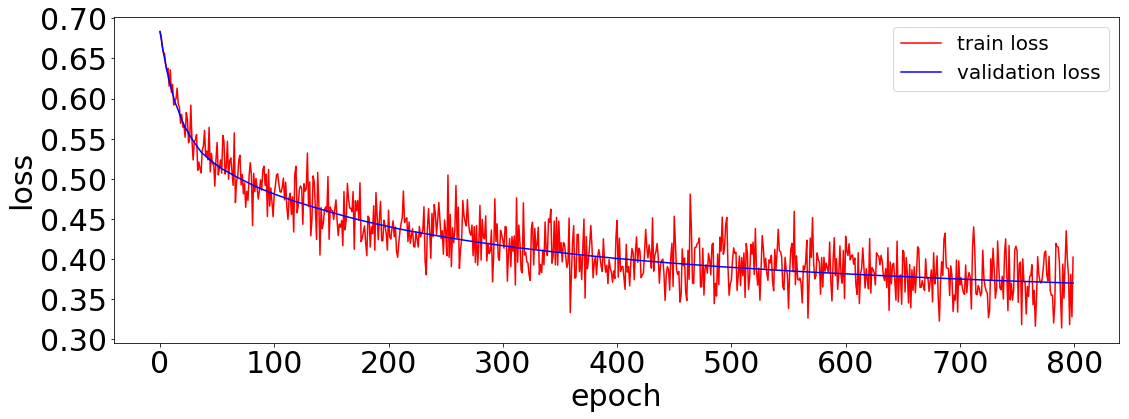

In [69]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("loss", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84]),
 <a list of 9 Text yticklabel objects>)

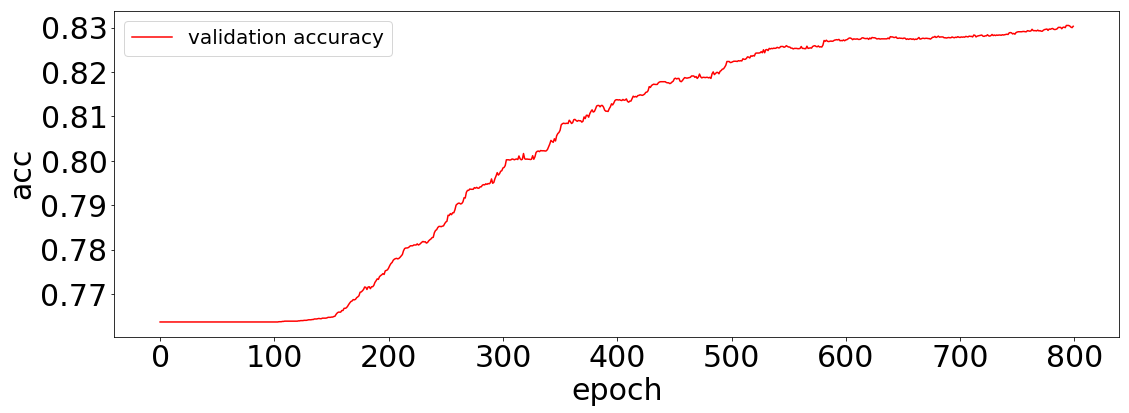

In [70]:

plt.figure(figsize=(18, 6))
plt.plot(val_acc, "-", color="r", label="validation accuracy")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("acc", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 8 Text yticklabel objects>)

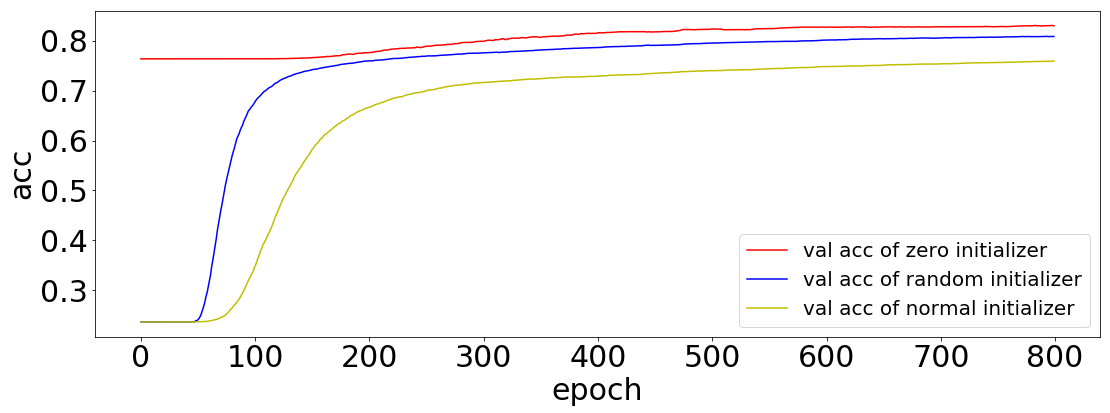

In [59]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(acc_zeros, "-", color="r", label="val acc of zero initializer")
plt.plot(acc_random, "-", color="b", label="val acc of random initializer")
plt.plot(acc_normal, "-", color="y", label="val acc of normal initializer")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("acc", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [58]:
print(np.mean(acc_zeros[-10:]))
print(np.mean(acc_random[-10:]))
print(np.mean(acc_normal[-10:]))

0.8302622689024016
0.8086296910509182
0.7589951477181991


In [71]:
print(np.mean(losses_train[-10:]))
print(np.mean(losses_val[-10:]))
print(np.mean(val_acc[-10:]))

0.37824992218979797
0.37036688058334216
0.8302315582580923
